In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

#Loading all the csv files
df_useu = pd.read_excel("dexuseu.xls")
df_usch = pd.read_excel("dexchus.xls")
df_usjp = pd.read_excel("dexjpus.xls")
df_usbz = pd.read_excel("dexbzus.xls")
df_usmx = pd.read_excel("dexmxus.xls")
df_usal = pd.read_excel("dexusal.xls")
df_usuk = pd.read_excel("dexusuk.xls")

In [2]:
#--------------------Removing Unnecessary Data---------------------

dfusjp=df_usjp[10:]
dfusch=df_usch[10:]
dfusbz=df_usbz[10:]
dfusmx=df_usmx[10:]
dfusal=df_usal[10:]
dfusuk=df_usuk[10:]
dfuseu=df_useu[10:] 

#--------------------Renaming the columns----------------------------

dfusjp.columns = ['observation_date', 'value']
dfusch.columns = ['observation_date', 'value']
dfusbz.columns = ['observation_date', 'value']
dfusmx.columns = ['observation_date', 'value']
dfusal.columns = ['observation_date', 'value']
dfusuk.columns = ['observation_date', 'value']
dfuseu.columns = ['observation_date', 'value']

#-------------------Removing rows with value as '0'-------------------

dfusjp = dfusjp[dfusjp.value != 0]
dfusch = dfusch[dfusch.value != 0]
dfuseu = dfuseu[dfuseu.value != 0]
dfusbz = dfusbz[dfusbz.value != 0]
dfusmx = dfusmx[dfusmx.value != 0]
dfusal = dfusal[dfusal.value != 0]
dfusuk = dfusuk[dfusuk.value != 0]



In [3]:
import pandas_profiling

C:\Users\Shreyansh\New folder\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Shreyansh\New folder\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Shreyansh\New folder\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Shreyansh\New folder\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Shreyansh\New folder\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Shreyansh\New folder\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loo

In [5]:
pandas_profiling.ProfileReport(dfuseu)

Number of variables,3
Number of observations,4865
Total Missing (%),0.0%
Total size in memory,114.1 KiB
Average record size in memory,24.0 B
Numeric,2
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [6]:
pandas_profiling.ProfileReport(dfusjp)

Number of variables,3
Number of observations,11880
Total Missing (%),0.0%
Total size in memory,278.5 KiB
Average record size in memory,24.0 B
Numeric,2
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [7]:
pandas_profiling.ProfileReport(dfusal)

Number of variables,3
Number of observations,11879
Total Missing (%),0.0%
Total size in memory,278.5 KiB
Average record size in memory,24.0 B
Numeric,2
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [8]:
pandas_profiling.ProfileReport(dfusbz)


Number of variables,3
Number of observations,5869
Total Missing (%),0.0%
Total size in memory,137.6 KiB
Average record size in memory,24.0 B
Numeric,2
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [9]:
pandas_profiling.ProfileReport(dfusuk)

Number of variables,3
Number of observations,11886
Total Missing (%),0.0%
Total size in memory,278.7 KiB
Average record size in memory,24.0 B
Numeric,2
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [10]:
pandas_profiling.ProfileReport(dfusch)


Number of variables,3
Number of observations,9326
Total Missing (%),0.0%
Total size in memory,218.7 KiB
Average record size in memory,24.0 B
Numeric,2
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [11]:
pandas_profiling.ProfileReport(dfusmx)

Number of variables,3
Number of observations,6154
Total Missing (%),0.0%
Total size in memory,144.3 KiB
Average record size in memory,24.0 B
Numeric,2
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


# Relative Strength Index(RSI)

In [12]:
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / \
    pd.stats.moments.ewma(d, com=period-1, adjust=False)
    print(rs)
    return (100 - 100 / (1 + rs))

In [13]:
dfuseu['RSI_USEU'] = RSI(dfuseu['value'], 30)
dfusuk['RSI_USUK'] = RSI(dfusuk['value'], 30)
dfusjp['RSI_USJP'] = RSI(dfusjp['value'], 30)
dfusbz['RSI_USBZ'] = RSI(dfusbz['value'], 30)
dfusal['RSI_USAL'] = RSI(dfusal['value'], 30)
dfusch['RSI_USCH'] = RSI(dfusch['value'], 30)
dfusmx['RSI_USMX'] = RSI(dfusmx['value'], 30)


C:\Users\Shreyansh\New folder\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=29,min_periods=0,adjust=False,ignore_na=False).mean()
  # This is added back by InteractiveShellApp.init_path()


42      0.383475
43      0.380555
44      0.326237
45      0.314320
46      0.301144
47      0.295038
48      0.390929
49      0.363509
50      0.329453
51      0.366729
52      0.352132
53      0.331797
54      0.349532
55      0.403605
56      0.393388
57      0.482020
58      0.467883
59      0.472068
60      0.469022
61      0.461324
62      0.574511
63      0.558172
64      0.517378
65      0.512749
66      0.516220
67      0.519810
68      0.489508
69      0.424044
70      0.412021
71      0.429403
          ...   
5030    1.050577
5031    1.006854
5032    1.056285
5033    0.958281
5034    1.026397
5035    1.100064
5036    1.129884
5037    1.208720
5038    1.085547
5039    1.088841
5040    1.175742
5041    1.120442
5042    1.181262
5043    1.094677
5044    1.001480
5045    0.904154
5046    0.919386
5047    0.854737
5048    0.778090
5049    0.772577
5050    0.735899
5051    0.664835
5052    0.637304
5053    0.639982
5054    0.619395
5055    0.603497
5056    0.553951
5057    0.5459

In [14]:
from  plotly import  tools
import  plotly.plotly  as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='singh.s', api_key='Fzcr1pVA1UJKaXHhhxvx')

RSI_USJP = go.Scatter(x=dfusjp.observation_date, y=dfusjp['RSI_USJP'])
RSI_USEU = go.Scatter(x=dfuseu.observation_date, y=dfuseu['RSI_USEU'])
RSI_USUK = go.Scatter(x=dfusuk.observation_date, y=dfusuk['RSI_USUK'])
RSI_USBZ = go.Scatter(x=dfusbz.observation_date, y=dfusbz['RSI_USBZ'])
RSI_USMX = go.Scatter(x=dfusmx.observation_date, y=dfusmx['RSI_USMX'])
RSI_USAL = go.Scatter(x=dfusal.observation_date, y=dfusal['RSI_USAL'])
RSI_USCH = go.Scatter(x=dfusch.observation_date, y=dfusch['RSI_USCH'])

# val = go.Scatter(x=dfusjp.observation_date, y=dfusjp['value'])

fig = tools.make_subplots(rows=3, cols=2, subplot_titles=('US_JP','US_EU','US_UK',
                                                         'US_BZ','US_MX','US_CH'))

fig.append_trace(RSI_USJP, 1, 1)
fig.append_trace(RSI_USEU, 1, 2)
fig.append_trace(RSI_USUK, 2, 1)
fig.append_trace(RSI_USBZ, 2, 2)
fig.append_trace(RSI_USCH, 3, 1)
fig.append_trace(RSI_USAL, 3, 2)

fig['layout'].update(height=600, width=600, title='RSI')

py.iplot(fig, filename='RSI')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5 ]  [ (3,2) x6,y6 ]

The draw time for this plot will be slow for clients without much RAM.


C:\Users\Shreyansh\New folder\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



#  MACD

In [15]:

short_window = 150
long_window = 300
dfusjp = dfusjp.set_index(pd.DatetimeIndex(dfusjp['observation_date']))
# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=dfusjp.observation_date.index)
signals['signal'] = 0.0
# Create short simple moving average over the short window
signals['short_mavg'] = dfusjp['value'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = dfusjp['value'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
#print(signals)


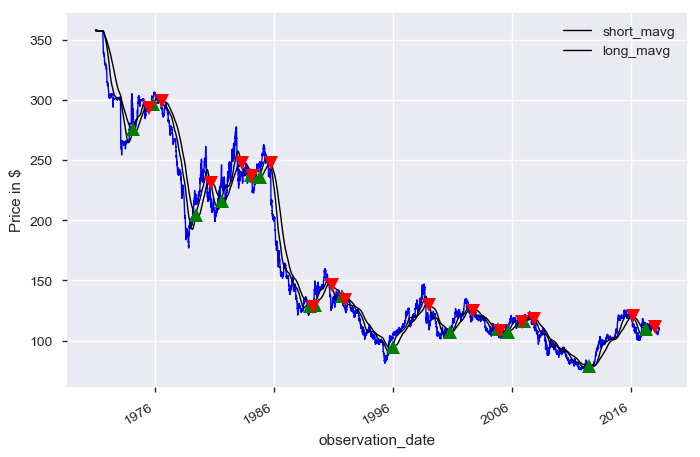

In [16]:
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
dfusjp['value'].plot(ax=ax1, color='b', lw=1.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, color='black', lw=1.)
listLongShort = ["No data"] 

for i in range(1, len(signals)):
    #                          # If the MACD crosses the signal line upward
    if signals.long_mavg[i] > dfusjp.value[i] and signals.long_mavg[i - 1] <= dfusjp.value[i - 1]:
        listLongShort.append("BUY")
    #                          # The other way around
    elif signals.short_mavg[i] < dfusjp.value[i] and signals.short_mavg[i - 1] >= dfusjp.value[i - 1]:
        listLongShort.append("SELL")
    #                          # Do nothing if not crossed
    else:
        listLongShort.append("HOLD")

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='g')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='r')
plt.rcParams['figure.figsize'] = (15,10)
      
# Show the plot
plt.show()

In [17]:
signals['positions'].value_counts()

 0.0    11847
-1.0       16
 1.0       16
Name: positions, dtype: int64

In [18]:
signals

,signal,short_mavg,long_mavg,positions
observation_date,,,,
1971-01-04,0.0,357.730000,357.730000,NaN
1971-01-05,0.0,357.770000,357.770000,0.0
1971-01-06,0.0,357.800000,357.800000,0.0
1971-01-07,0.0,357.817500,357.817500,0.0
1971-01-08,0.0,357.818000,357.818000,0.0
1971-01-11,0.0,357.840000,357.840000,0.0
1971-01-12,0.0,357.871429,357.871429,0.0
1971-01-13,0.0,357.942500,357.942500,0.0
1971-01-14,0.0,357.993333,357.993333,0.0


In [19]:
dfusjp['Advice'] = listLongShort
dfusjp.head()

,observation_date,value,RSI_USJP,Advice
observation_date,,,,
1971-01-04,1971-01-04 00:00:00,357.73,NaN,No data
1971-01-05,1971-01-05 00:00:00,357.81,NaN,SELL
1971-01-06,1971-01-06 00:00:00,357.86,NaN,HOLD
1971-01-07,1971-01-07 00:00:00,357.87,NaN,HOLD
1971-01-08,1971-01-08 00:00:00,357.82,NaN,HOLD


In [20]:
signals.head()

,signal,short_mavg,long_mavg,positions
observation_date,,,,
1971-01-04,0.0,357.7300,357.7300,NaN
1971-01-05,0.0,357.7700,357.7700,0.0
1971-01-06,0.0,357.8000,357.8000,0.0
1971-01-07,0.0,357.8175,357.8175,0.0
1971-01-08,0.0,357.8180,357.8180,0.0


In [21]:
sell=[]
buy=[]
for i in range(1,len(signals)):
    if signals['positions'].iloc[i]==-1:
        sell.append(signals['long_mavg'].iloc[i])
    elif signals['positions'].iloc[i]==1:
        buy.append(signals['short_mavg'].iloc[i])
      


In [22]:
aq=[]
for i in range(1,len(sell)):
    aq.append(sell[i]-buy[i])

aq

[2.7715333333331955,
 26.681200000001866,
 31.681933333335962,
 -0.704933333331013,
 11.343166666668736,
 -0.8411999999982527,
 16.428666666668335,
 -3.125933333331517,
 35.31776666666829,
 17.688233333335205,
 -1.345699999998459,
 8.282066666668399,
 1.8085000000015299,
 41.20153333333499,
 2.265133333334859]

In [23]:
profit=[]
loss=[]
for i in range(1,len(aq)):
    if aq[i]>0:
        profit.append(aq[i])
    elif aq[i]<0:
        loss.append(aq[i])


In [24]:
loss

[-0.704933333331013,
 -0.8411999999982527,
 -3.125933333331517,
 -1.345699999998459]

In [25]:
GrossLoss=sum(loss)
GrossLoss

-6.0177666666592415

In [26]:
GrossProfit=sum(profit)
NetProfit=GrossProfit+GrossLoss
NetProfit

186.6804333333589

In [27]:
ProfitFactor=GrossProfit/GrossLoss
ProfitFactor

-32.02154730718305

In [28]:
NumberOfDays=len(dfusjp)
NumberOfDays

11880

In [29]:
NumberOfWinningRate=len(profit)/NumberOfDays
NumberOfWinningRate

0.0008417508417508417

In [30]:
principal = dfusjp['value'].iloc[0]
totalreturn = GrossProfit/principal
print('%.2f%%' % (totalreturn*100))

53.87%


In [31]:
AvarageDailyReturn=GrossProfit/NumberOfDays*100
AvarageDailyReturn

1.6220387205388733

In [32]:
AnnualReturn=AvarageDailyReturn*365
AnnualReturn

592.0441329966887

In [33]:
AnnualSTD=15.87*(np.std(dfusjp['value']))
AnnualSTD

1161.3137352065892

In [34]:
from scipy.stats import skew
skewness = skew(AvarageDailyReturn)
print(skewness)

0.0


In [35]:
from scipy.stats import kurtosis
kur = kurtosis(AvarageDailyReturn)
print(kur)

-3.0


In [36]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='singh.s', api_key='Fzcr1pVA1UJKaXHhhxvx')
trace = go.Table(
    header=dict(values=['Risk Metrics', 'Values']),
    cells=dict(values=[['GrossProfit', 'GrossLoss', 'NetProfit','Profit Factor','NumberOfDays','NumberOfWinningRate','TotalReturn','AvarageDailyReturn','AnnualReturn','AnnualSTD','KUR'],
                       [GrossProfit, GrossLoss, NetProfit,ProfitFactor,NumberOfDays,NumberOfWinningRate,(totalreturn*100),AvarageDailyReturn,AnnualReturn,AnnualSTD,kur]]))


data = [trace] 
py.iplot(data, filename = 'basic_table')

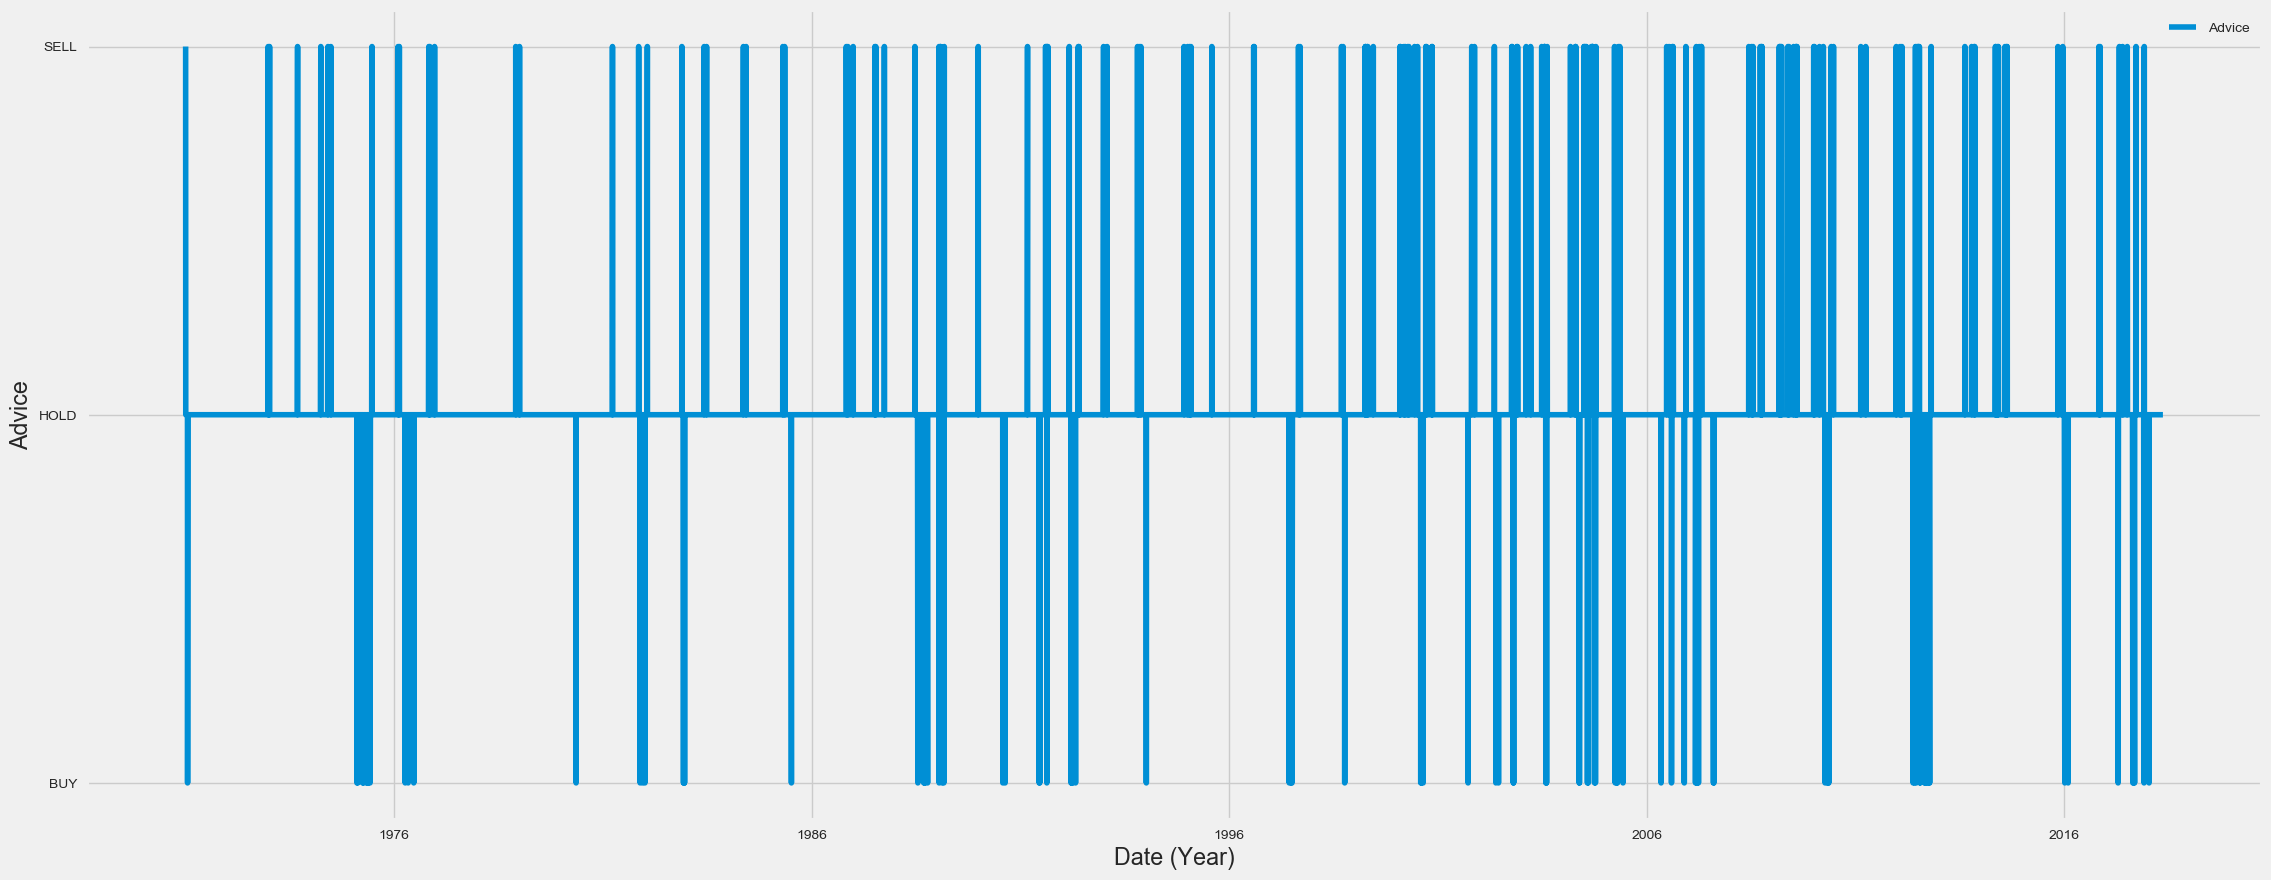

In [37]:
import matplotlib.pyplot as plt
dfusjp = dfusjp[dfusjp.Advice != 'No data']

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)

x_axis=dfusjp.observation_date

y_axis=dfusjp.Advice

ax.plot(x_axis, y_axis)


ax.set_xlabel('Date (Year)')
ax.set_ylabel('Advice')
ax.legend()
plt.show();

#  Bollinger Bands

In [38]:
dfuseu = dfuseu.set_index(pd.DatetimeIndex(dfuseu['observation_date'])) 
del dfuseu['observation_date']

In [39]:
dfuseu.head()

,value,RSI_USEU
observation_date,,
1999-01-04,1.1812,NaN
1999-01-05,1.176,NaN
1999-01-06,1.1636,NaN
1999-01-07,1.1672,NaN
1999-01-08,1.1554,NaN


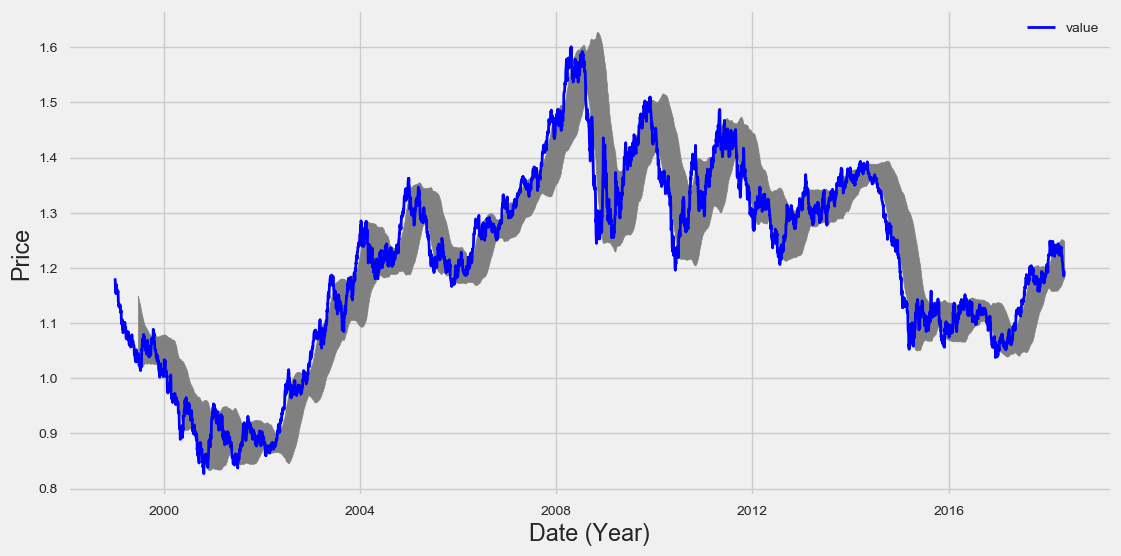

In [40]:
window = 120
no_of_std = 1.5

#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = dfuseu['value'].rolling(window).mean()
rolling_std = dfuseu['value'].rolling(window).std()
 
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
dfuseu['Rolling Mean'] = rolling_mean
dfuseu['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
dfuseu['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std) 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

x_axis=dfuseu.index.get_level_values(0)

ax.fill_between(x_axis, dfuseu['Bollinger High'], dfuseu['Bollinger Low'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, dfuseu['value'], color='blue', lw=2)


# Set Title & Show the Image
# ax.set_title('30 Day Bollinger Band For Facebook')
ax.set_xlabel('Date (Year)')
ax.set_ylabel('Price')
ax.legend()
plt.show();

In [41]:
dfuseu.tail()

,value,RSI_USEU,Rolling Mean,Bollinger High,Bollinger Low
observation_date,,,,,
2018-05-07,1.1927,37.636292,1.215003,1.249582,1.180423
2018-05-08,1.1863,35.647895,1.215085,1.249482,1.180688
2018-05-09,1.1852,35.316149,1.215133,1.249426,1.180841
2018-05-10,1.1896,37.714655,1.215237,1.249311,1.181162
2018-05-11,1.1951,40.564518,1.215363,1.249202,1.181524


Using Bollinger Bands to calculate the Profit and Loss of the Forex:
Here we are using Bollinger Bands to get the intersections of the Forex with Upper and Lower Band of Bollinger.Whenever the intersection is from bottom to top we consider it as being bought at the lower price and sold at the higher price.We will call it as profit.Similarly for vice versa case we call it as loss.

In [42]:
dfuseu['status']= None
for i in range(len(dfuseu)):                            
    if (dfuseu['value'].iloc[i] > dfuseu['Bollinger High'].iloc[i]) and (dfuseu['value'].iloc[i-1] < dfuseu['Bollinger High'].iloc[i-1]):
        dfuseu['status'].iloc[i]= -1 
        
    if (dfuseu['value'].iloc[i] < dfuseu['Bollinger Low'].iloc[i]) and (dfuseu['value'].iloc[i-1] > dfuseu['Bollinger Low'].iloc[i-1]):
        dfuseu['status'].iloc[i]= 1
        
dfuseu['status'].fillna(method='ffill',inplace=True)        




dfuseu['status'].value_counts()

C:\Users\Shreyansh\New folder\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



-1.0    2640
 1.0    2100
Name: status, dtype: int64

In [43]:
dfuseu.tail()

,value,RSI_USEU,Rolling Mean,Bollinger High,Bollinger Low,status
observation_date,,,,,,
2018-05-07,1.1927,37.636292,1.215003,1.249582,1.180423,-1.0
2018-05-08,1.1863,35.647895,1.215085,1.249482,1.180688,-1.0
2018-05-09,1.1852,35.316149,1.215133,1.249426,1.180841,-1.0
2018-05-10,1.1896,37.714655,1.215237,1.249311,1.181162,-1.0
2018-05-11,1.1951,40.564518,1.215363,1.249202,1.181524,-1.0


In [44]:
profit=[]
loss=[]
for i in range(1,len(dfuseu['status'])):
    if dfuseu['status'].iloc[i]==1 and dfuseu['status'].iloc[i-1]==-1:
        a=dfuseu['value'].iloc[i]-dfuseu['value'].iloc[i-1]
        loss.append(a)
    elif dfuseu['status'].iloc[i]==-1 and dfuseu['status'].iloc[i-1]==1:
        b=dfuseu['value'].iloc[i]-dfuseu['value'].iloc[i-1]
        profit.append(b)
profit

[0.0040999999999999925,
 0.0131,
 0.0027000000000000357,
 0.00019999999999997797,
 0.010900000000000132,
 0.0045999999999999375,
 0.010399999999999965,
 0.020100000000000007,
 0.013199999999999878,
 0.00969999999999982,
 0.0038999999999997925,
 0.015599999999999836,
 0.02410000000000001,
 0.009500000000000064]

In [45]:
GrossLoss=sum(loss)
GrossLoss

-0.13839999999999963

In [46]:
GrossProfit=sum(profit)
NetProfit=GrossProfit-GrossLoss
NetProfit

0.2804999999999991

In [47]:
ProfitFactor=GrossProfit/GrossLoss
ProfitFactor

-1.0267341040462414

In [48]:
NumberOfDays=len(dfuseu)
NumberOfDays

4865

In [49]:
NumberOfWinningRate=len(profit)/NumberOfDays
NumberOfWinningRate

0.0028776978417266188

In [50]:
a=[1.601]

In [51]:
dfuseu.loc[dfuseu['value'].isin(a)]

,value,RSI_USEU,Rolling Mean,Bollinger High,Bollinger Low,status
observation_date,,,,,,
2008-04-22,1.601,63.309356,1.497451,1.5692,1.425702,-1.0


In [52]:
b=[0.827]

In [53]:
dfuseu.loc[dfuseu['value'].isin(b)]

,value,RSI_USEU,Rolling Mean,Bollinger High,Bollinger Low,status
observation_date,,,,,,
2000-10-25,0.827,32.548023,0.906266,0.959693,0.852839,1.0


In [54]:
principal = dfuseu['value'].iloc[0]
totalreturn = GrossProfit/principal
print('%.2f%%' % (totalreturn*100))

12.03%


In [55]:
AvarageDailyReturn=GrossProfit/NumberOfDays*100
AvarageDailyReturn

0.0029208633093525064

In [56]:
AnnualReturn=AvarageDailyReturn*365
AnnualReturn

1.0661151079136648

In [57]:
AnnualSTD=15.87*(np.std(dfuseu['value']))
AnnualSTD

2.71900261767575

In [58]:
from scipy.stats import skew
skewness = skew(AvarageDailyReturn)
print(skewness)

0.0


In [59]:
from scipy.stats import kurtosis
kur = kurtosis(AvarageDailyReturn)
print(kur)

-3.0


In [60]:
# Rp=1.066/AnnualSTD                  
# print(sharpe)



In [61]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='singh.s', api_key='Fzcr1pVA1UJKaXHhhxvx')
trace = go.Table(
    header=dict(values=['Risk Metrics', 'Values']),
    cells=dict(values=[['GrossProfit', 'GrossLoss', 'NetProfit','Profit Factor','NumberOfDays','NumberOfWinningRate','BestMonth',
                       'WorstMonth','TotalReturn','AvarageDailyReturn','AnnualReturn','AnnualSTD','KUR'],
                       [GrossProfit, GrossLoss, NetProfit,ProfitFactor,NumberOfDays,NumberOfWinningRate,'April'
                       ,'October',(totalreturn*100),AvarageDailyReturn,AnnualReturn,AnnualSTD,kur]]))


data = [trace] 
py.iplot(data, filename = 'basic_table')

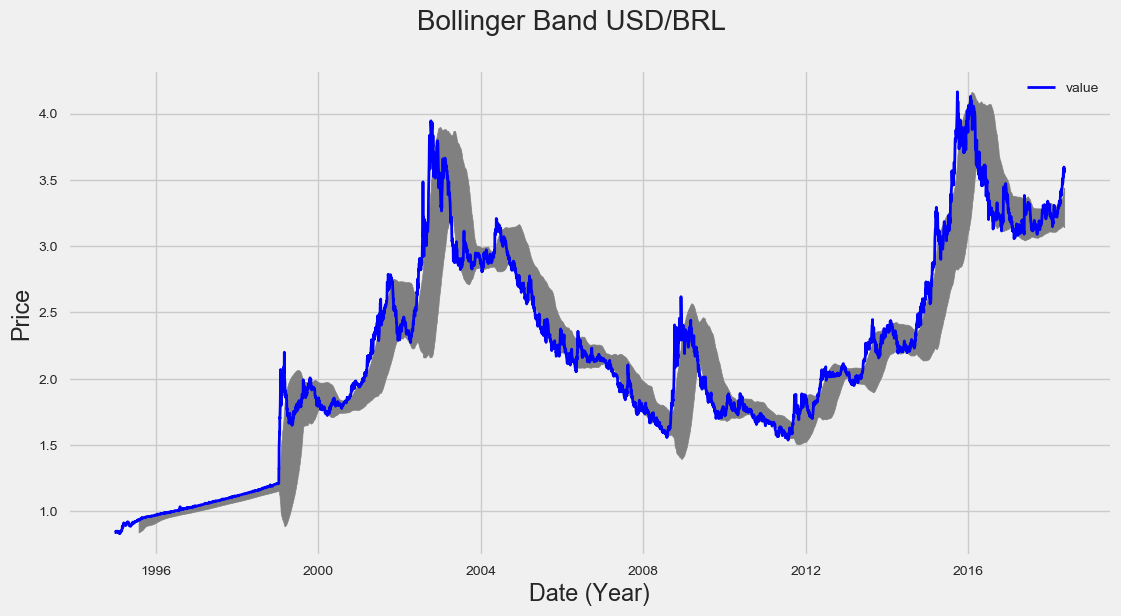

In [62]:
window = 150
no_of_std = 1.5
dfusbz = dfusbz.set_index(pd.DatetimeIndex(dfusbz['observation_date'])) 
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = dfusbz['value'].rolling(window).mean()
rolling_std = dfusbz['value'].rolling(window).std()
 
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
dfusbz['Rolling Mean'] = rolling_mean
dfusbz['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
dfusbz['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std) 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
fig.suptitle('Bollinger Band USD/BRL', fontsize=20)
ax = fig.add_subplot(111)

x_axis=dfusbz.index.get_level_values(0)

ax.fill_between(x_axis, dfusbz['Bollinger High'], dfusbz['Bollinger Low'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, dfusbz['value'], color='blue', lw=2)


# Set Title & Show the Image
# ax.set_title('30 Day Bollinger Band')
ax.set_xlabel('Date (Year)')
ax.set_ylabel('Price')
ax.legend()

plt.show();

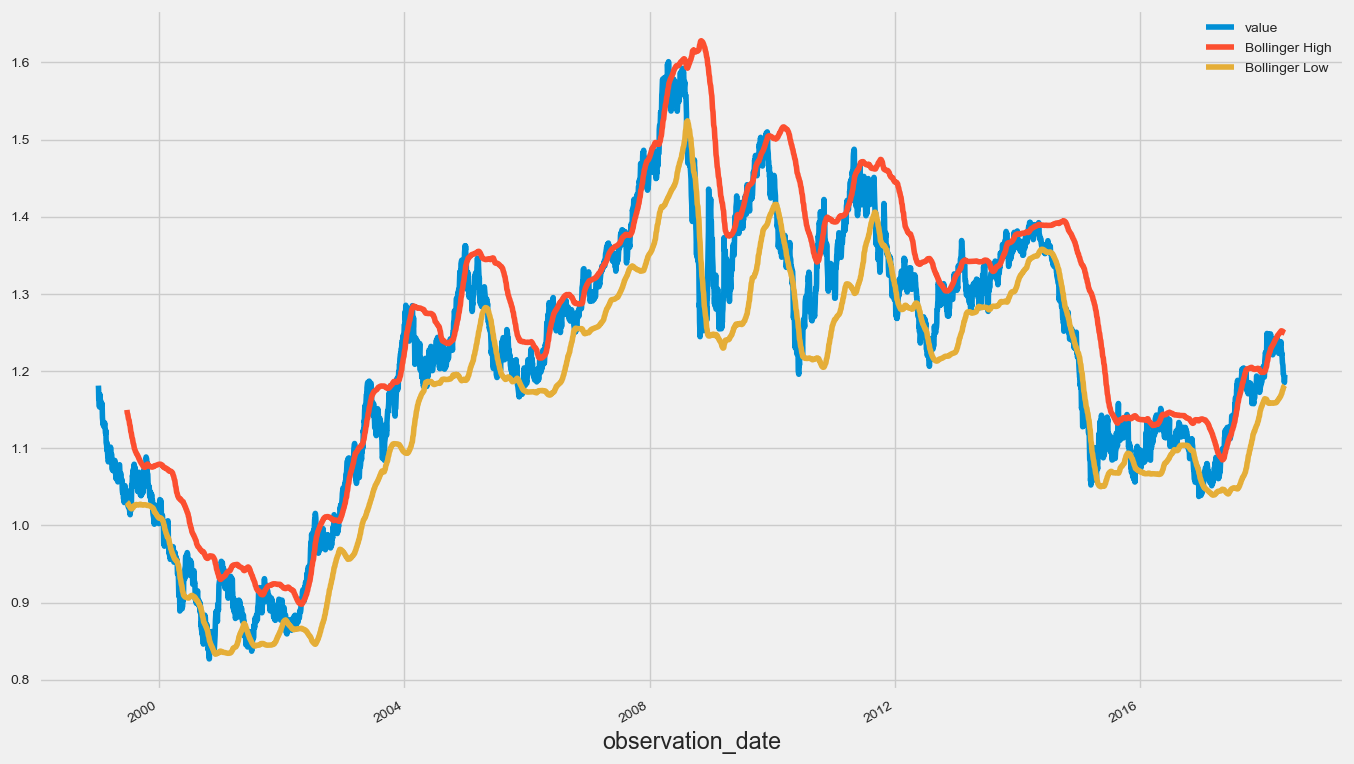

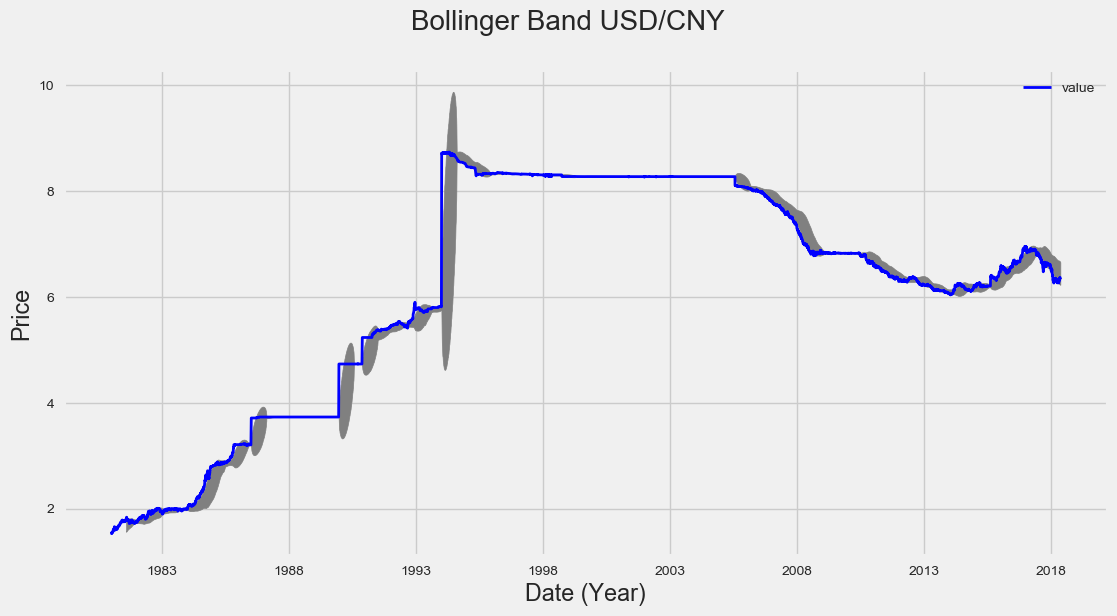

In [63]:
window = 150
no_of_std = 1.5
dfusch = dfusch.set_index(pd.DatetimeIndex(dfusch['observation_date'])) 
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = dfusch['value'].rolling(window).mean()
rolling_std = dfusch['value'].rolling(window).std()
 
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
dfusch['Rolling Mean'] = rolling_mean
dfusch['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
dfusch['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std) 
import matplotlib.pyplot as plt
dfuseu[['value','Bollinger High','Bollinger Low']].plot()
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
fig.suptitle('Bollinger Band USD/CNY', fontsize=20)
ax = fig.add_subplot(111)

x_axis=dfusch.index.get_level_values(0)

ax.fill_between(x_axis, dfusch['Bollinger High'], dfusch['Bollinger Low'], color='grey')


# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, dfusch['value'], color='blue', lw=2)


# Set Title & Show the Image
# ax.set_title('30 Day Bollinger Band')
ax.set_xlabel('Date (Year)')
ax.set_ylabel('Price')
ax.legend()

plt.show();

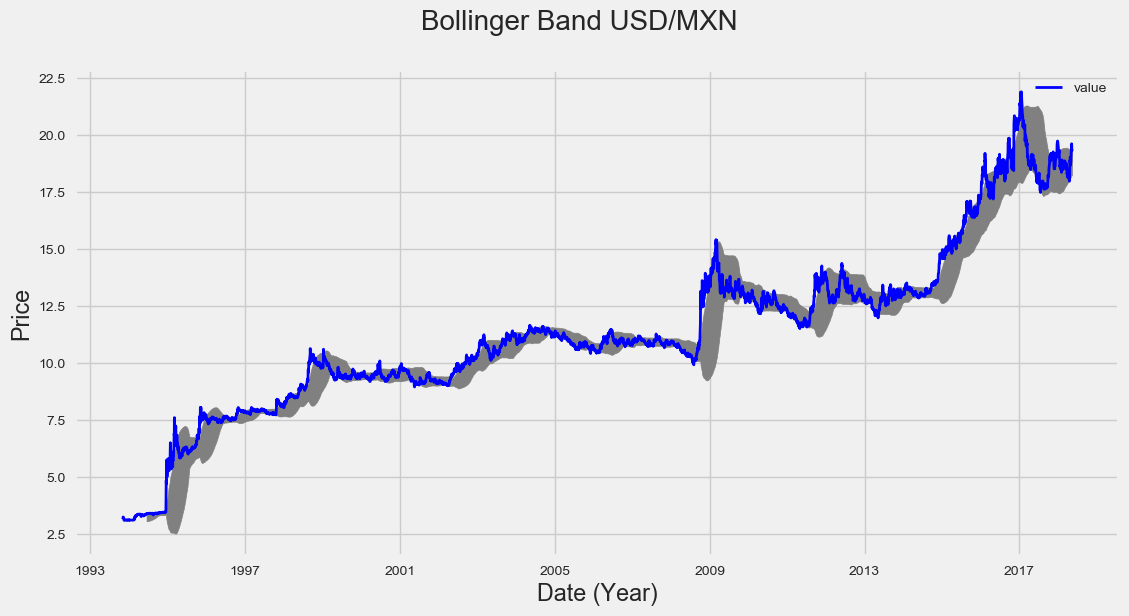

In [64]:
window = 150
no_of_std = 1.5
dfusmx = dfusmx.set_index(pd.DatetimeIndex(dfusmx['observation_date'])) 
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = dfusmx['value'].rolling(window).mean()
rolling_std = dfusmx['value'].rolling(window).std()
 
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
dfusmx['Rolling Mean'] = rolling_mean
dfusmx['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
dfusmx['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std) 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
fig.suptitle('Bollinger Band USD/MXN', fontsize=20)
ax = fig.add_subplot(111)

x_axis=dfusmx.index.get_level_values(0)

ax.fill_between(x_axis, dfusmx['Bollinger High'], dfusmx['Bollinger Low'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, dfusmx['value'], color='blue', lw=2)


# Set Title & Show the Image
# ax.set_title('30 Day Bollinger Band')
ax.set_xlabel('Date (Year)')
ax.set_ylabel('Price')
ax.legend()
plt.show();

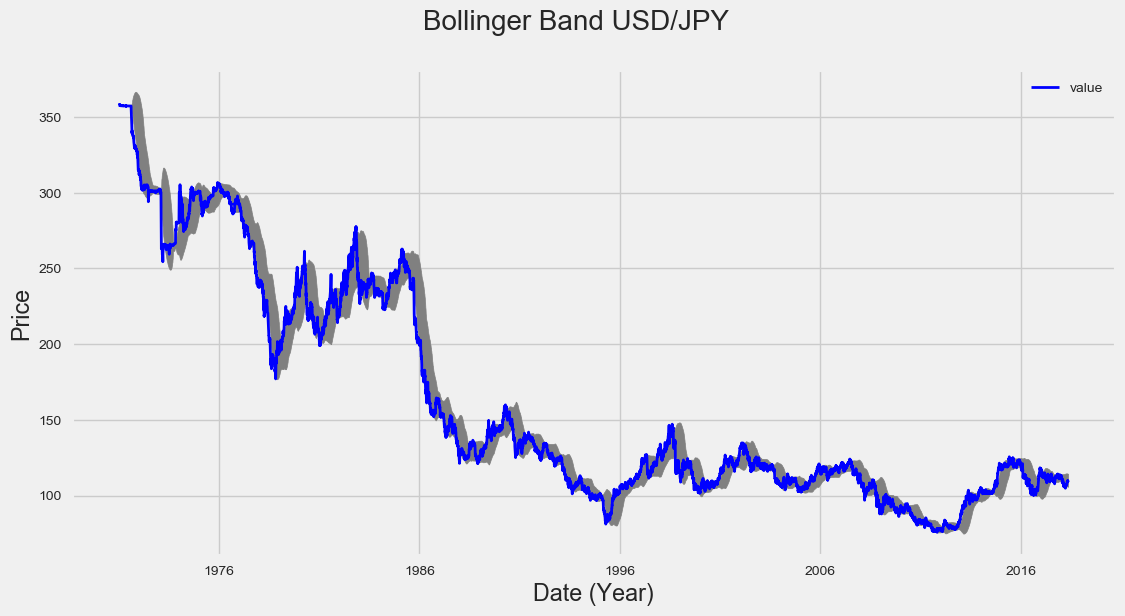

In [65]:
window = 150
no_of_std = 1.5
dfusjp = dfusjp.set_index(pd.DatetimeIndex(dfusjp['observation_date'])) 
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = dfusjp['value'].rolling(window).mean()
rolling_std = dfusjp['value'].rolling(window).std()
 
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
dfusjp['Rolling Mean'] = rolling_mean
dfusjp['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
dfusjp['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std) 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
fig.suptitle('Bollinger Band USD/JPY', fontsize=20)
ax = fig.add_subplot(111)

x_axis=dfusjp.index.get_level_values(0)

ax.fill_between(x_axis, dfusjp['Bollinger High'], dfusjp['Bollinger Low'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, dfusjp['value'], color='blue', lw=2)


# Set Title & Show the Image
# ax.set_title('30 Day Bollinger Band')
ax.set_xlabel('Date (Year)')
ax.set_ylabel('Price')
ax.legend()
plt.show();

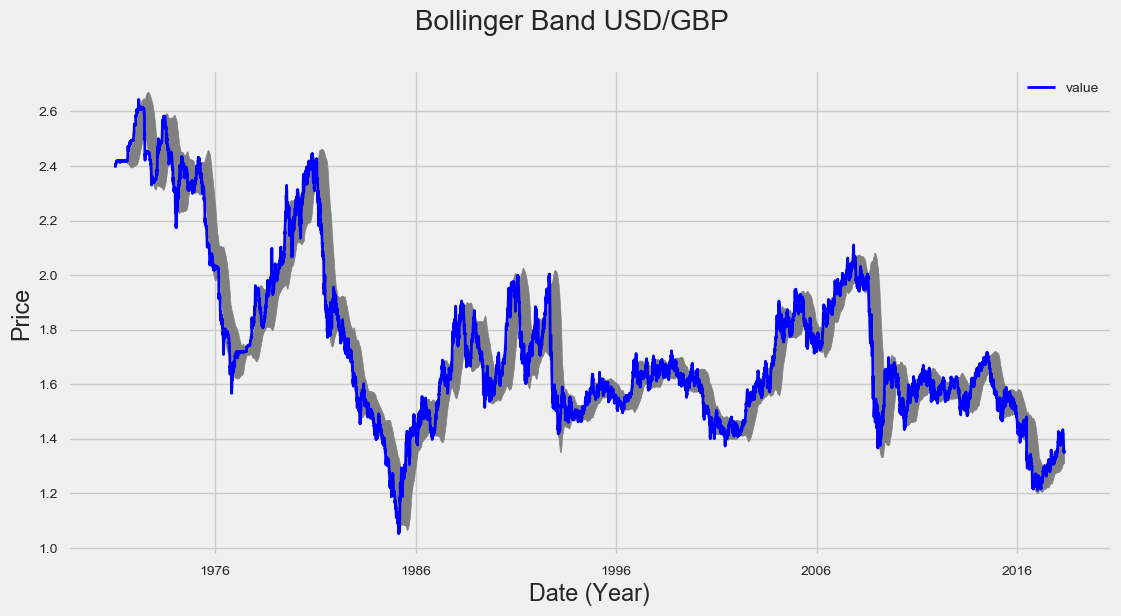

In [66]:
window = 150
no_of_std = 1.5
dfusuk = dfusuk.set_index(pd.DatetimeIndex(dfusuk['observation_date'])) 
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = dfusuk['value'].rolling(window).mean()
rolling_std = dfusuk['value'].rolling(window).std()
 
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
dfusuk['Rolling Mean'] = rolling_mean
dfusuk['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
dfusuk['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std) 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
fig.suptitle('Bollinger Band USD/GBP', fontsize=20)
ax = fig.add_subplot(111)

x_axis=dfusuk.index.get_level_values(0)

ax.fill_between(x_axis, dfusuk['Bollinger High'], dfusuk['Bollinger Low'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, dfusuk['value'], color='blue', lw=2)


# Set Title & Show the Image
# ax.set_title('30 Day Bollinger Band')
ax.set_xlabel('Date (Year)')
ax.set_ylabel('Price')
ax.legend()
plt.show();

# PCA

Principal Component Analysis is statistical method that is used to tack;le multicollinearity between the variables.Here we are finding the Principal Components and then using them to perform Linear Regression that will be used to forecast the output.

In [67]:
import numpy as np
import pandas as pd

#Loading all the csv files
df1 = pd.read_excel("NewForexData.xls")

In [68]:
df = df1.set_index(pd.DatetimeIndex(df1['observation_date']))
del df['observation_date']

In [69]:
df.dropna(inplace=True)
df.head()

,DEXUSUK,DEXUSEU,DEXUSAL,DEXMXUS,DEXJPUS,DEXCHUS,DEXBZUS
observation_date,,,,,,,
1999-01-04,1.6581,1.1812,0.6354,9.5175,120.19,8.2796,1.730
1999-01-05,1.6566,1.1760,0.6345,9.5100,120.60,8.2794,1.735
1999-01-06,1.6547,1.1636,0.6315,9.4750,122.00,8.2795,1.730
1999-01-07,1.6495,1.1672,0.6280,9.4950,120.74,8.2797,1.730
1999-01-08,1.6405,1.1554,0.6272,9.4980,121.34,8.2797,1.735


In [70]:
from sklearn.preprocessing import StandardScaler
from math import sqrt
import numpy as np
normalise = StandardScaler().fit_transform(df.values)
normalise

array([[ 0.21467674, -0.15731435, -0.55416911, ...,  0.72912657,
         0.79229683, -0.76642756],
       [ 0.20675201, -0.1874746 , -0.55844978, ...,  0.74611117,
         0.79217236, -0.75986816],
       [ 0.19671403, -0.25939518, -0.57271868, ...,  0.80410738,
         0.79223459, -0.76642756],
       ...,
       [-1.25773649,  0.0828076 , -0.03002499, ...,  0.29374076,
        -0.4032948 ,  1.68219498],
       [-1.2440003 ,  0.10658779, -0.00196283, ...,  0.28752688,
        -0.41231883,  1.62827675],
       [-1.20596164,  0.16226824,  0.01183044, ...,  0.2763419 ,
        -0.41897795,  1.67091282]])

In [71]:
# Computing Eigen Vectors 
import numpy as np
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='simifoss', api_key='3BjhvZBoOrcKm1orWM26')
from plotly.graph_objs import *
import plotly.tools as tls
mean_vec = np.mean(normalise, axis=0)
cov_mat = (normalise - mean_vec).T.dot((normalise - mean_vec)) / (normalise.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

print('NumPy covariance matrix: \n%s' %np.cov(normalise.T))

cov_mat = np.cov(normalise.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

cor_mat1 = np.corrcoef(normalise.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

cor_mat2 = np.corrcoef(df.values.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

u,s,v = np.linalg.svd(normalise.T)
u

for ev in eig_vecs:
   np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

Covariance matrix 
[[ 1.00020825  0.56313328  0.1698837  -0.36520738  0.01708731  0.1316311
  -0.29914809]
 [ 0.56313328  1.00020825  0.56567849  0.09585099 -0.3134654  -0.27528615
  -0.33522167]
 [ 0.1698837   0.56567849  1.00020825  0.59438834  0.28954578  0.32363846
   0.18752745]
 [-0.36520738  0.09585099  0.59438834  1.00020825  0.47128199  0.27527428
   0.71796157]
 [ 0.01708731 -0.3134654   0.28954578  0.47128199  1.00020825  0.86508225
   0.71210946]
 [ 0.1316311  -0.27528615  0.32363846  0.27527428  0.86508225  1.00020825
   0.51151494]
 [-0.29914809 -0.33522167  0.18752745  0.71796157  0.71210946  0.51151494
   1.00020825]]
NumPy covariance matrix: 
[[ 1.00020825  0.56313328  0.1698837  -0.36520738  0.01708731  0.1316311
  -0.29914809]
 [ 0.56313328  1.00020825  0.56567849  0.09585099 -0.3134654  -0.27528615
  -0.33522167]
 [ 0.1698837   0.56567849  1.00020825  0.59438834  0.28954578  0.32363846
   0.18752745]
 [-0.36520738  0.09585099  0.59438834  1.00020825  0.47128199  0.2

In [72]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
plotly.tools.set_credentials_file(username='singh.s', api_key='Fzcr1pVA1UJKaXHhhxvx')

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
       x=['PC %s' %i for i in range(1,5)],
       y=var_exp,
       showlegend=False)

trace2 = Scatter(
       x=['PC %s' %i for i in range(1,5)],
       y=cum_var_exp,
       name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
       yaxis=YAxis(title='Explained variance in percent'),
       title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [73]:
print('Eigenvalues in descending order:')
for i in eig_pairs:
 print(i[0])

Eigenvalues in descending order:
3.088815299351414
1.9550880711930239
1.2866035658406492
0.418759647949762
0.10529848613311155
0.08259977297386499
0.06283515655817917


In [74]:
pca1 = np.dot(df.values,eig_vecs[0])
pca2=np.dot(df.values,eig_vecs[1])
pca3=np.dot(df.values,eig_vecs[2])

In [75]:
pca = pd.DataFrame()
pca['pca1']=pca1
pca['pca2']=pca2
pca['pca3']=pca3
pca.head()

,pca1,pca2,pca3
0,56.774919,-54.754796,-9.526729
1,56.943384,-54.948944,-9.555529
2,57.512612,-55.600061,-9.655912
3,56.993274,-55.021448,-9.565525
4,57.242358,-55.305600,-9.615871


In [76]:
norm = pd.DataFrame()
b=[]
for a in normalise:
     b.append(a[3])
norm = pd.DataFrame()

# Using PCA to find y_hat: 

In [77]:
X = pca.ix[:,0:3].values
y = df.ix[:,5].values
y

C:\Users\Shreyansh\New folder\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\Users\Shreyansh\New folder\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



array([8.2796, 8.2794, 8.2795, ..., 6.3585, 6.344 , 6.3333])

In [78]:
y = y.reshape(len(pca), 1)

In [79]:
from numpy import dot
from numpy.linalg import inv
beta_hat = dot(dot((inv(dot(X.T, X))), X.T), y) #OLS estimator beta: N x 1
beta_hat

array([[0.86036113],
       [0.51978375],
       [1.28263981]])

In [80]:
y_hat = np.dot(X,beta_hat) #Predictive value of Y_t using OLS
y_hat
df['Y_hat']=y_hat

# Residuals:

In [81]:
eps = y - y_hat #Noise from OLS: Y - X*beta


In [82]:
sigma2 = (np.dot(eps.T,eps))/len(eps) #variance of Y_t or residuals
sigma2

array([[0.25356221]])

In [83]:
sigma = np.std(eps) #standard deviation of Y_t or residuals
sigma

0.5023937006727879

In [84]:
varcov_beta_hat = np.dot((sigma**2),(inv(dot(X.T, X)))) #variance-covariance matrix of beta_hat
varcov_beta_hat

array([[1.01727841e-04, 8.22856825e-05, 1.36876404e-04],
       [8.22856825e-05, 6.73608092e-05, 1.06940954e-04],
       [1.36876404e-04, 1.06940954e-04, 2.02488452e-04]])

In [85]:
var_beta_hat = np.diag(varcov_beta_hat) #N x 1
var_beta_hat

array([1.01727841e-04, 6.73608092e-05, 2.02488452e-04])

# R-Square Test

In [86]:
r_square = 1 - (np.var(eps)/np.var(y)) #This score tells us the regression sum of squares divided by the total sum of squares
r_square

0.9022415847905134

In [87]:
np.var(eps)

0.2523994304756988

In [88]:
t_stat = beta_hat/np.std(var_beta_hat) # t-test stat: N x 1
t_stat

array([[15003.94747496],
       [ 9064.5751292 ],
       [22368.11908425]])

In [89]:
from scipy.stats import norm as nrm
p_val_t= 1- nrm.cdf(t_stat) #t-test significance level: N x 1
p_val_t

array([[0.],
       [0.],
       [0.]])

In [90]:
f_stat = np.dot(np.dot(beta_hat.T,varcov_beta_hat),beta_hat)/(np.dot(eps.T,eps)) 
f_stat #size: (1 x N)*(N x N)*(N x 1)/((1 x T) * (T x 1)) = 1 x 1

array([[7.75880505e-07]])

In [91]:
from scipy import stats
p_val_F = 1 - stats.chi2.cdf(f_stat,1) 
p_val_F

array([[0.99929719]])

In [92]:
df['Regressed Value']=y_hat

In [93]:
df.head()

,DEXUSUK,DEXUSEU,DEXUSAL,DEXMXUS,DEXJPUS,DEXCHUS,DEXBZUS,Y_hat,Regressed Value
observation_date,,,,,,,,,
1999-01-04,1.6581,1.1812,0.6354,9.5175,120.19,8.2796,1.730,8.166919,8.166919
1999-01-05,1.6566,1.1760,0.6345,9.5100,120.60,8.2794,1.735,8.174004,8.174004
1999-01-06,1.6547,1.1636,0.6315,9.4750,122.00,8.2795,1.730,8.196550,8.196550
1999-01-07,1.6495,1.1672,0.6280,9.4950,120.74,8.2797,1.730,8.166420,8.166420
1999-01-08,1.6405,1.1554,0.6272,9.4980,121.34,8.2797,1.735,8.168449,8.168449


# Linear Regression on Predicted Value:

In [94]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
values = DataFrame(df['Y_hat'].values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't']
result = dataframe.corr()
print(result)

          t-1         t
t-1  1.000000  0.350132
t    0.350132  1.000000


C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



Lag: 32
Coefficients: const        0.318781
L1.Y_hat     0.000152
L2.Y_hat     0.000605
L3.Y_hat    -0.000224
L4.Y_hat     0.005382
L5.Y_hat     0.085552
L6.Y_hat     0.005090
L7.Y_hat     0.000425
L8.Y_hat     0.016599
L9.Y_hat     0.055548
L10.Y_hat    0.022375
L11.Y_hat    0.030047
L12.Y_hat    0.018601
L13.Y_hat    0.020072
L14.Y_hat    0.031997
L15.Y_hat    0.014286
L16.Y_hat    0.012399
L17.Y_hat    0.016488
L18.Y_hat    0.026985
L19.Y_hat    0.053921
L20.Y_hat    0.025300
L21.Y_hat    0.058550
L22.Y_hat    0.015141
L23.Y_hat    0.018669
L24.Y_hat    0.111645
L25.Y_hat    0.076501
L26.Y_hat    0.053648
L27.Y_hat    0.022691
L28.Y_hat    0.010916
L29.Y_hat    0.052982
L30.Y_hat    0.026473
L31.Y_hat    0.051324
L32.Y_hat    0.013646
dtype: float64


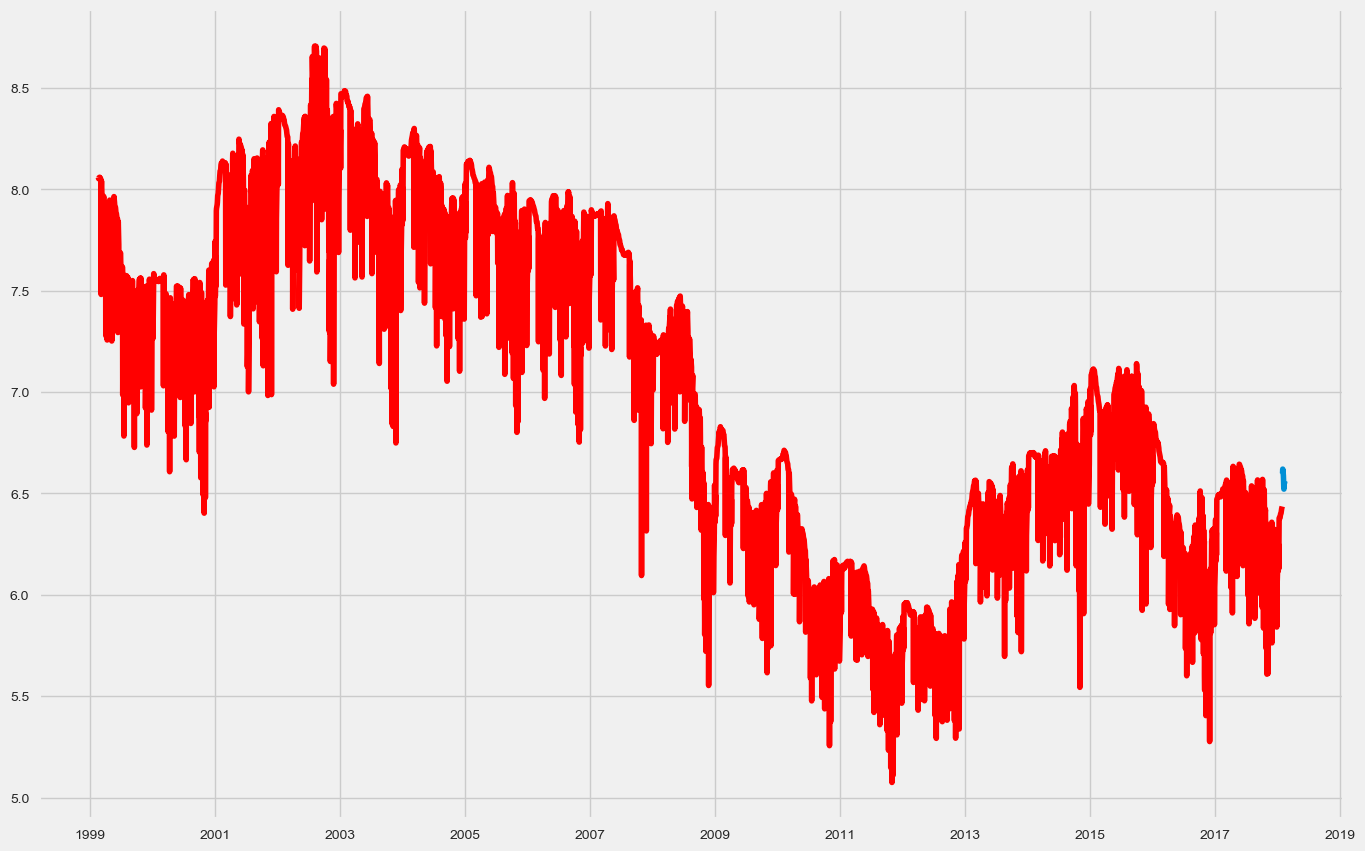

In [95]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# split dataset
X = df['Y_hat']
train, test = X[1:len(X)-10], X[len(X)-10:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=32, end=4790, dynamic=False)
len(predictions)
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()



In [117]:
model_fit.predict('2018-01-05','2018-01-05')

observation_date
2018-01-05    6.116884
dtype: float64

# Kalman Filter 

In [96]:
from scipy import optimize
from scipy.optimize import fmin
df_useu1 = pd.read_excel("DEXUSEU.xls")
dfuseu1=df_useu1[10:] 

dfuseu1.columns = ['observation_date', 'value']

#-------------------Removing rows with value as '0'-------------------

dfuseu1 = dfuseu1[dfuseu1.value != 0]
def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 / wid)

Parameter Estimation:

In [97]:
from numpy import exp, linspace, random
from scipy.optimize import curve_fit
x = linspace(-10, 10, 101)
y = gaussian(x, 2.33, 0.21, 1.51) + random.normal(0, 0.2, len(x))

In [98]:
from scipy.optimize import curve_fit
x = linspace(-10, 10, 101)
from lmfit import Model
gmodel = Model(gaussian)
gmodel.param_names
['amp', 'cen', 'wid']
gmodel.independent_vars
['x']


['x']

In [99]:
params = gmodel.make_params(cen=2, amp=20, wid=10)


In [100]:
x = linspace(0, 10, 20)
y = gmodel.eval(params, x=x)
y

array([13.40640092, 16.09579018, 18.28318127, 19.64855388, 19.97785161,
       19.21791807, 17.49054154, 15.06050514, 12.26917003,  9.45649496,
        6.89579861,  4.75749464,  3.1053561 ,  1.91771416,  1.12045832,
        0.61936534,  0.32391977,  0.16027559,  0.0750303 ,  0.03323115])

In [101]:
Z=1.5
H=2.9
T=0.0144
Q=0.6
pt_update=0.2
def KalOutput(data):
    
    kf=[]
    pt_update=0.2
    alpha_updated=0
    for y in data:
#------------------------Prediction Equation-----------------------------
        alpha_pred=T*alpha_updated+Z
        pt_pred=T*pt_update*T+Q 
#-----------------------Update Equation----------------------------------
        Ft=Z*pt_update*Z+H
        pt_update=pt_pred-(pt_pred*Z*Z*pt_pred)/(Ft)
        alpha_updated=alpha_pred+(pt_pred*Z)*(y-(Z*alpha_pred))/Ft
        kf.append(alpha_updated)
    return kf

Passing value to the Function and Returning the Kalman Filter Output:

In [102]:
trace1=[]
trace1=KalOutput(dfuseu.value)
trace2=[]
trace2=KalOutput(dfusuk.value)
trace3=[]
trace3=KalOutput(dfusbz.value)
trace4=[]
trace4=KalOutput(dfusal.value)
trace5=[]
trace5=KalOutput(dfusmx.value)
trace6=[]
trace6=KalOutput(dfusjp.value)

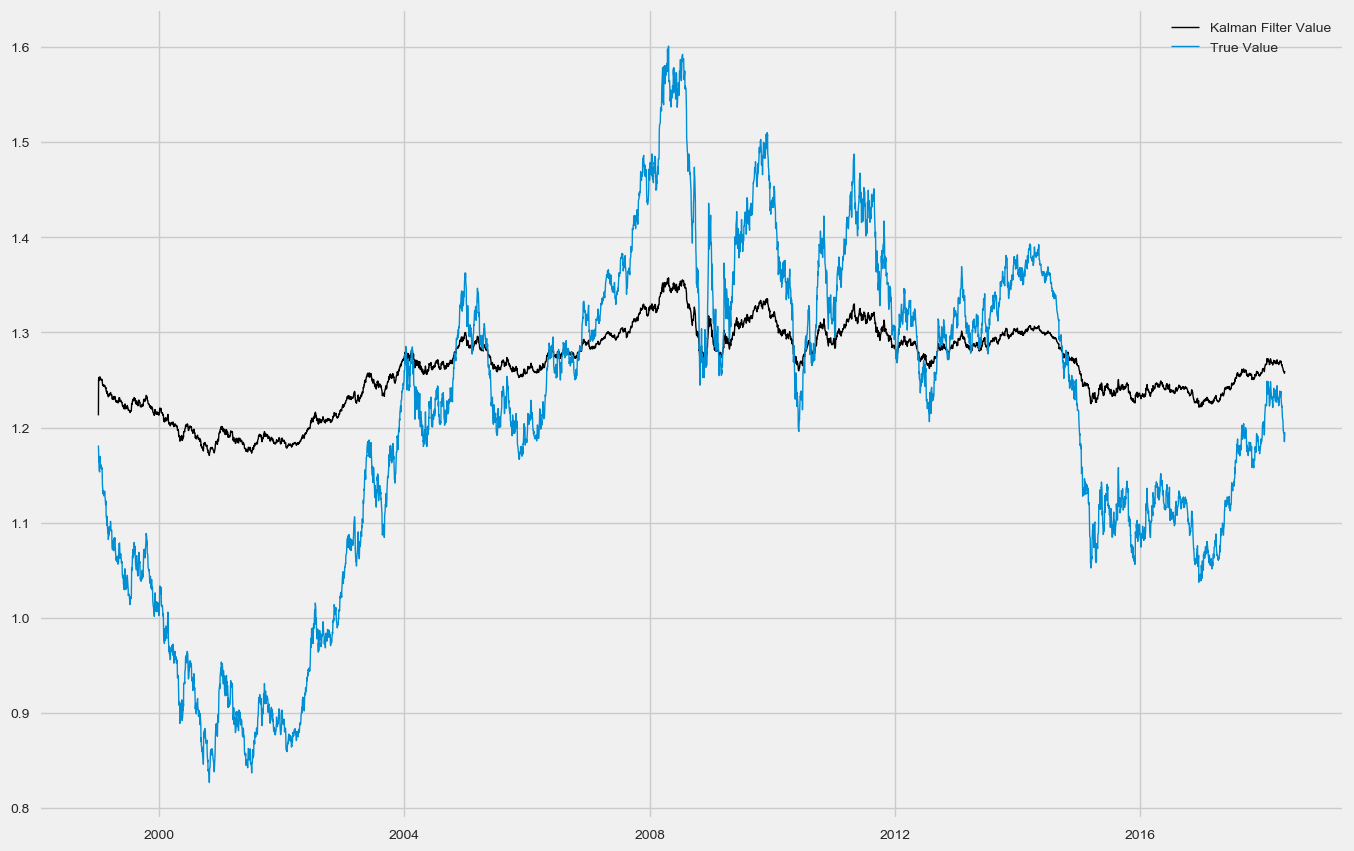

In [103]:
#Kalman Filtered Value vs Original Data
plt.plot(dfuseu1.observation_date,trace1,color='black', lw='1',label='Kalman Filter Value')
plt.plot(dfuseu1.observation_date,dfuseu1.value,lw='1',label='True Value') 
plt.legend(loc=1)
plt.rcParams['figure.figsize'] = (15, 10)

In [104]:
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
US_BZ = go.Scatter(x=dfusbz.observation_date, y=trace3)
US_UK = go.Scatter(x=dfusuk.observation_date, y=trace2)
US_EU=  go.Scatter(x=dfuseu1.observation_date, y=trace1)
US_AL=  go.Scatter(x=dfusal.observation_date, y=trace4)
US_MX=  go.Scatter(x=dfusmx.observation_date, y=trace5)
US_JP=  go.Scatter(x=dfusjp.observation_date, y=trace6)

In [105]:
fig = tools.make_subplots(rows=3, cols=2, subplot_titles=('US-EU', 'US-UK',
                                                          'US-BZ', 'US-AL',
                                                          'US-MX','US-JP'))

fig.append_trace(US_EU, 1, 1)
fig.append_trace(US_UK, 1, 2)
fig.append_trace(US_BZ, 2, 1)
fig.append_trace(US_AL, 2, 2)
fig.append_trace(US_MX, 3, 1)
fig.append_trace(US_JP, 3, 2)

fig['layout'].update(height=600, width=600, title='Kalman Filtered Output')
                                                  

py.iplot(fig, filename='Kalman Filter')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5 ]  [ (3,2) x6,y6 ]

The draw time for this plot will be slow for clients without much RAM.


C:\Users\Shreyansh\New folder\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow

